Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**Dwa gangi**

Zbiór danych:

In [57]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [58]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

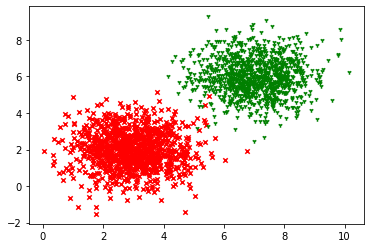

In [59]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

In [60]:
x_label1

array([3.07155032, 1.67765835, 2.4212774 , 3.52394757, 2.80378675,
       2.51506161, 2.44860242, 3.88748694, 3.49254058, 1.68741291,
       1.78465646, 3.25524764, 1.7134678 , 3.9054626 , 2.21351377,
       3.26140679, 3.11211159, 0.99213518, 2.01551961, 3.28825316,
       2.56856307, 3.49588746, 3.8798661 , 2.80458089, 2.36496067,
       2.14075721, 5.12722663, 2.30097465, 4.15527904, 1.45092945,
       3.45041786, 2.7690134 , 4.98209305, 5.60676138, 4.60840301,
       4.112642  , 2.50759208, 2.47476071, 2.80028224, 4.0052214 ,
       3.06875455, 2.5489026 , 2.84399278, 2.23048449, 4.17449235,
       2.2206567 , 4.08677431, 3.2809867 , 3.83116186, 3.4579757 ,
       2.34642605, 1.28423389, 3.64658694, 2.63036873, 3.38827114,
       2.84979261, 1.98092982, 2.20543962, 3.6172165 , 4.38353492,
       5.29477841, 2.29172706, 2.6542393 , 3.17934483, 2.75854021,
       3.11022378, 1.66915537, 3.78455286, 3.3191306 , 2.53133022,
       0.37224701, 1.20622057, 3.05741346, 3.97999669, 3.13458

Definiujemy model:

In [61]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [62]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "sigmoid"))
model.add(Dense(units = 1, use_bias=True, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [63]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.SGD(learning_rate=0.2)

In [64]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Przygotowanie danych:

In [66]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.07155032, 2.78934244],
       [1.67765835, 0.59381758],
       [2.4212774 , 0.1332204 ],
       ...,
       [7.6669042 , 7.69793382],
       [7.54677438, 6.70901347],
       [7.67694209, 6.85666224]])

Proces **uczenia**:

In [67]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 0.3196 - val_loss: 0.0873
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0431 - val_loss: 0.0393
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0399
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.0109
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0180
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0492
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0222
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.0197
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0065
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0326
Epoch 11/

In [68]:
Loss = h.history['loss']
Loss

[0.3195871412754059,
 0.04310465231537819,
 0.023446306586265564,
 0.02289067767560482,
 0.0153892757371068,
 0.016775863245129585,
 0.013154970481991768,
 0.013806377537548542,
 0.017913179472088814,
 0.010728200897574425,
 0.013869221322238445,
 0.03410720080137253,
 0.010504974983632565,
 0.015170109458267689,
 0.031212609261274338,
 0.011940027587115765,
 0.01343359611928463,
 0.01316844578832388,
 0.011911452747881413,
 0.011446957476437092,
 0.012519867159426212,
 0.012273736298084259,
 0.010443609207868576,
 0.01323858741670847,
 0.013051300309598446,
 0.01064504124224186,
 0.015623321756720543,
 0.013672087341547012,
 0.01133724581450224,
 0.015563943423330784,
 0.02861160598695278,
 0.013568447902798653,
 0.011064521968364716,
 0.012233581393957138,
 0.013045404106378555,
 0.013315052725374699,
 0.00915998313575983,
 0.020123012363910675,
 0.010409168899059296,
 0.01623949036002159,
 0.017426593229174614,
 0.015723107382655144,
 0.0134787168353796,
 0.013404743745923042,
 0.01

Sprawdźmy jakie są **wartości wag**:

In [69]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-1.7424707  2.5061858 -1.760079 ]
 [-1.675316   5.261621  -1.8686308]]
[15.291124   1.2085257 16.8492   ]


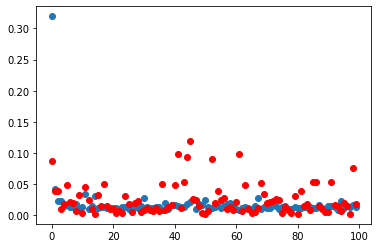

In [70]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

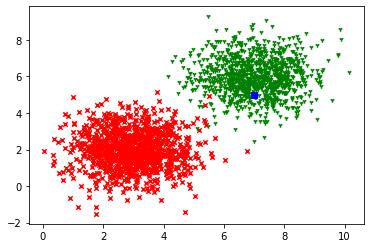

In [71]:
x=7.0
y=5.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [72]:
model.predict([[x,y]])

1/1 [==============================] - 0s 55ms/step


array([[0.9989512]], dtype=float32)